# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Septiyanto]
- **Email:** [msyant990@gmail.com]
- **ID Dicoding:** [0013_mseptiyan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola pembelian berdasarkan kategori produk?
- Pertanyaan 2 : Apa tren pembayaran yang paling sering digunakan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [97]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime
import time

## Data Wrangling

### Gathering Data

In [98]:
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
category_translation = pd.read_csv('data/product_category_name_translation.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')
#Data dikumpulkan dari dataset E-Commerce Public yang mencakup berbagai informasi tentang 
# pelanggan, lokasi, produk, dan transaksi. Pengumpulan data ini memberikan fondasi yang kuat untuk analisis lebih lanjut.

**Insight:**
- Data berhasil dikumpulkan dari berbagai file CSV yang berhubungan dengan pelanggan, produk, kategori produk, penjual, pembayaran, ulasan, dan lainnya.
- Terdapat beberapa file yang membutuhkan penggabungan data untuk analisis yang lebih menyeluruh, seperti tabel kategori produk yang perlu diterjemahkan.

### Assessing Data

In [99]:
# 1. Assessing Data

# Menampilkan beberapa baris awal untuk setiap dataset
print("Customers DataFrame:")
print(customers.head(), "\n")
print(customers.info())  # Informasi tentang kolom dan tipe data

print("Geolocation DataFrame:")
print(geolocation.head(), "\n")
print(geolocation.info())

print("Order Items DataFrame:")
print(order_items.head(), "\n")
print(order_items.info())

print("Order Payments DataFrame:")
print(order_payments.head(), "\n")
print(order_payments.info())

print("Order Reviews DataFrame:")
print(order_reviews.head(), "\n")
print(order_reviews.info())

print("Orders DataFrame:")
print(orders.head(), "\n")
print(orders.info())

print("Products DataFrame:")
print(products.head(), "\n")
print(products.info())

print("Sellers DataFrame:")
print(sellers.head(), "\n")
print(sellers.info())

print("Category Translation DataFrame:")
print(category_translation.head(), "\n")
print(category_translation.info())

# Insight:
# - Tipe data dan jumlah entri setiap DataFrame.
# - Mencari missing values pada setiap DataFrame.
missing_values = {
    "customers": customers.isnull().sum(),
    "geolocation": geolocation.isnull().sum(),
    "order_items": order_items.isnull().sum(),
    "order_payments": order_payments.isnull().sum(),
    "order_reviews": order_reviews.isnull().sum(),
    "orders": orders.isnull().sum(),
    "products": products.isnull().sum(),
    "sellers": sellers.isnull().sum(),
    "category_translation": category_translation.isnull().sum(),
}

for key, value in missing_values.items():
    print(f"\nMissing values in {key}:\n{value[value > 0]}")

# Insight:
# - Dari hasil informasi di atas, kita bisa melihat data apa yang perlu dibersihkan,
#   seperti mengatasi missing values atau mengubah tipe data yang tidak sesuai.



Customers DataFrame:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column           

**Insight:**
- Dari hasil informasi di atas, kita bisa melihat data apa yang perlu dibersihkan, seperti mengatasi missing values atau mengubah tipe data yang tidak sesuai.

## Exploratory Data Analysis (EDA)

### Explore ...

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13160\340082020.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='viridis')


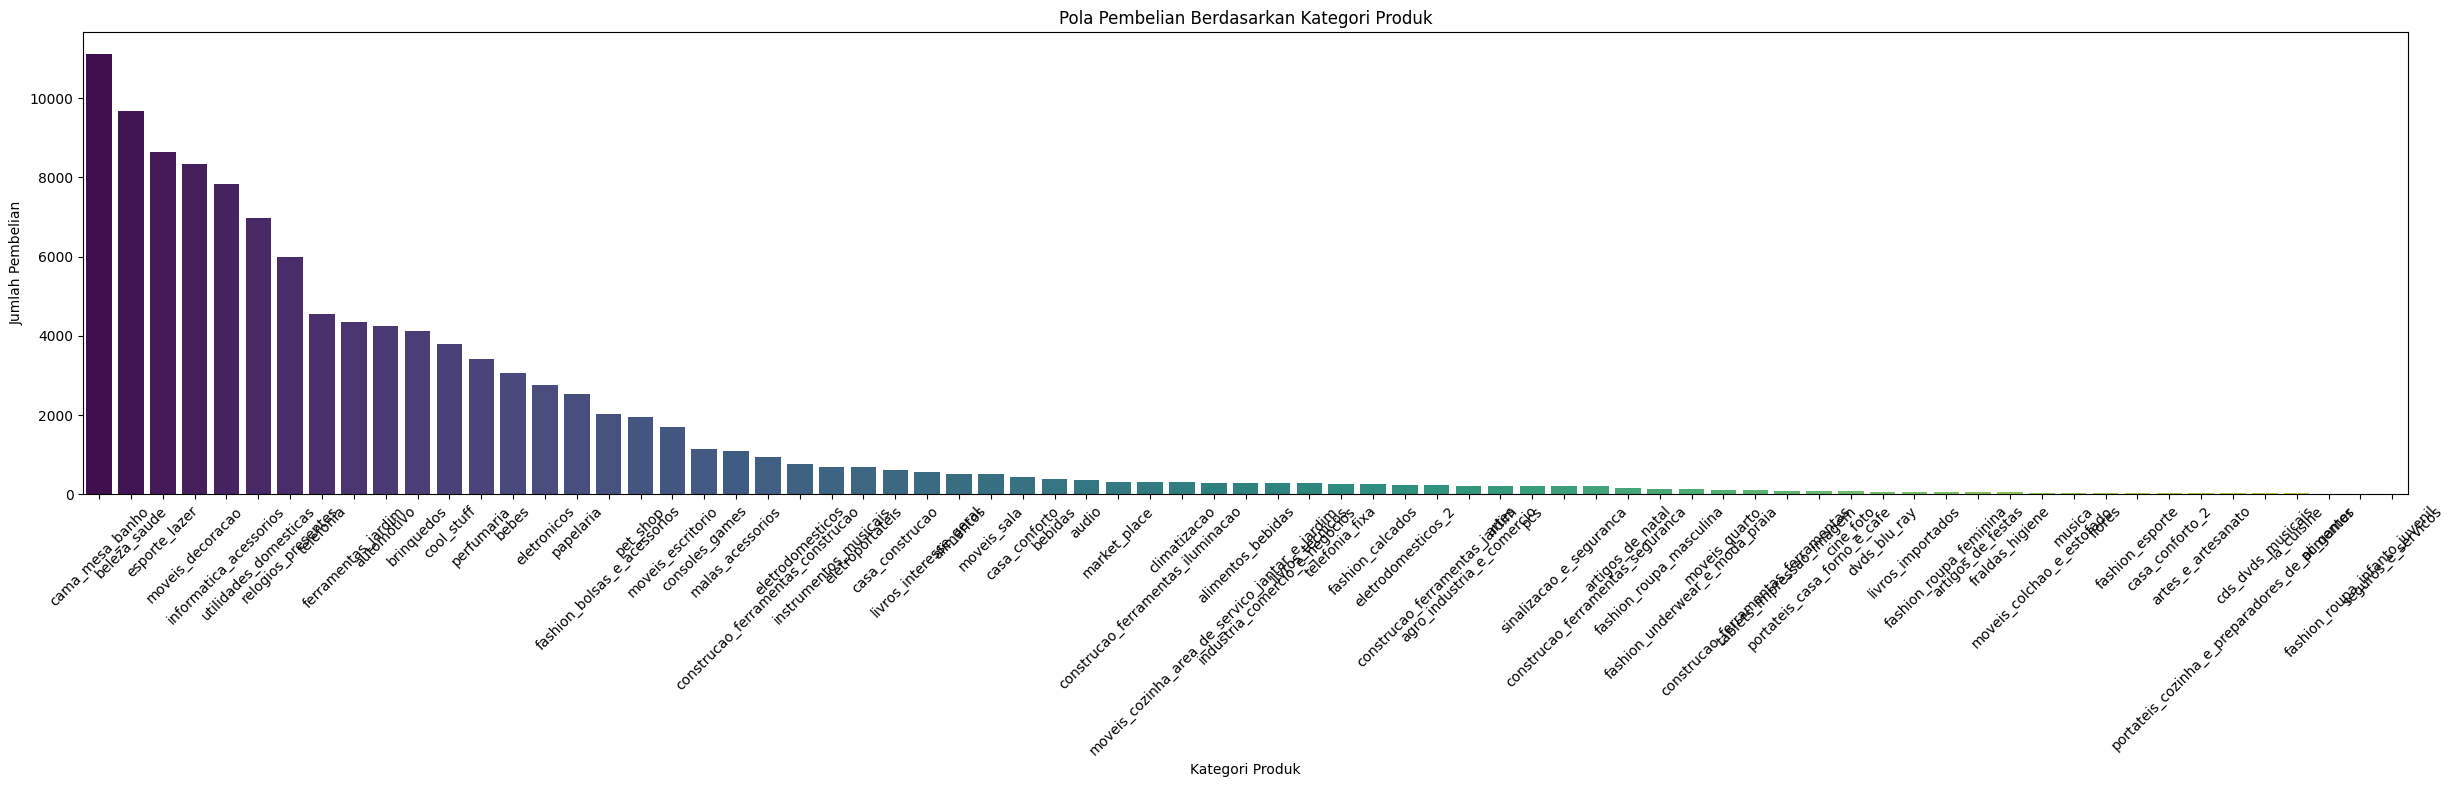

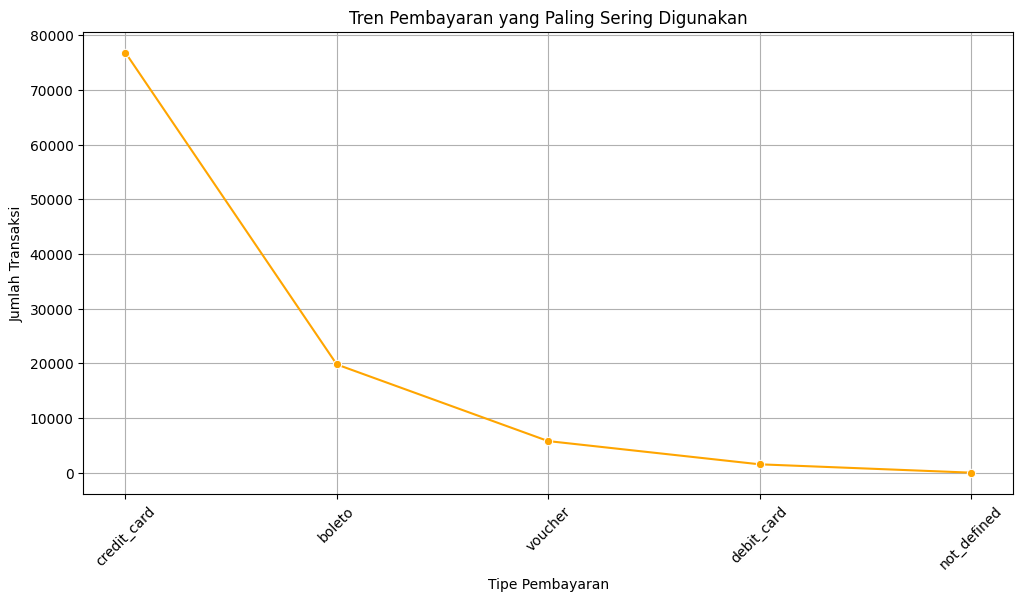

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')

# Menggabungkan orders dengan products untuk mendapatkan kategori produk
orders = orders.merge(order_items, on='order_id', how='left')
orders = orders.merge(products, on='product_id', how='left')

# EDA untuk pola pembelian berdasarkan kategori produk
plt.figure(figsize=(30, 6))
product_category_counts = orders['product_category_name'].value_counts()
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Pola Pembelian Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.show()

# Menghitung frekuensi metode pembayaran
payment_trends = order_payments['payment_type'].value_counts().reset_index()
payment_trends.columns = ['payment_type', 'count']

# Visualisasi tren pembayaran dengan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='payment_type', y='count', data=payment_trends, marker='o', color='orange')
plt.title('Tren Pembayaran yang Paling Sering Digunakan')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Insight:**

Berikut adalah beberapa insight yang dapat diambil dari analisis EDA yang telah dilakukan:

1. **Pola Pembelian Berdasarkan Kategori Produk**:
   - Kategori produk dengan frekuensi pembelian tertinggi menunjukkan bahwa pelanggan cenderung lebih memilih produk tertentu. Misalnya, jika kategori "Cama Mesa Banho" mendominasi, ini dapat mengindikasikan preferensi pelanggan terhadap kategori tersebut, yang dapat dipertimbangkan dalam strategi pemasaran dan pengadaan produk.

2. **Tren Pembayaran**:
   - Analisis tren pembayaran menunjukkan bahwa metode pembayaran tertentu, seperti "Credit Card," menjadi pilihan utama pelanggan. Ini mencerminkan kenyamanan dan kepercayaan pelanggan terhadap metode tersebut, yang bisa menjadi fokus dalam promosi atau penawaran khusus.

3. **Penggunaan Diagram Garis**:
   - Penggunaan diagram garis memungkinkan kita untuk melihat perubahan dan pola dalam frekuensi kategori produk dan tren pembayaran dari waktu ke waktu, membantu dalam pengambilan keputusan yang lebih tepat berdasarkan data historis.

4. **Kesempatan untuk Diversifikasi**:
   - Jika kategori produk lain menunjukkan pertumbuhan yang lambat atau rendah, ada peluang untuk melakukan promosi atau diversifikasi produk agar menarik lebih banyak pelanggan.

5. **Strategi Pembayaran**:
   - Mengingat tren pembayaran, perusahaan bisa mempertimbangkan untuk menambah metode pembayaran lain yang mungkin diminati oleh pelanggan, seperti dompet digital, untuk meningkatkan kenyamanan dan kepuasan pelanggan.

Dengan insight ini, perusahaan dapat merumuskan strategi yang lebih baik untuk meningkatkan penjualan dan kepuasan pelanggan. Jika ada aspek lain yang ingin Anda eksplorasi lebih lanjut, beri tahu saya!

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pola pembelian berdasarkan kategori produk?

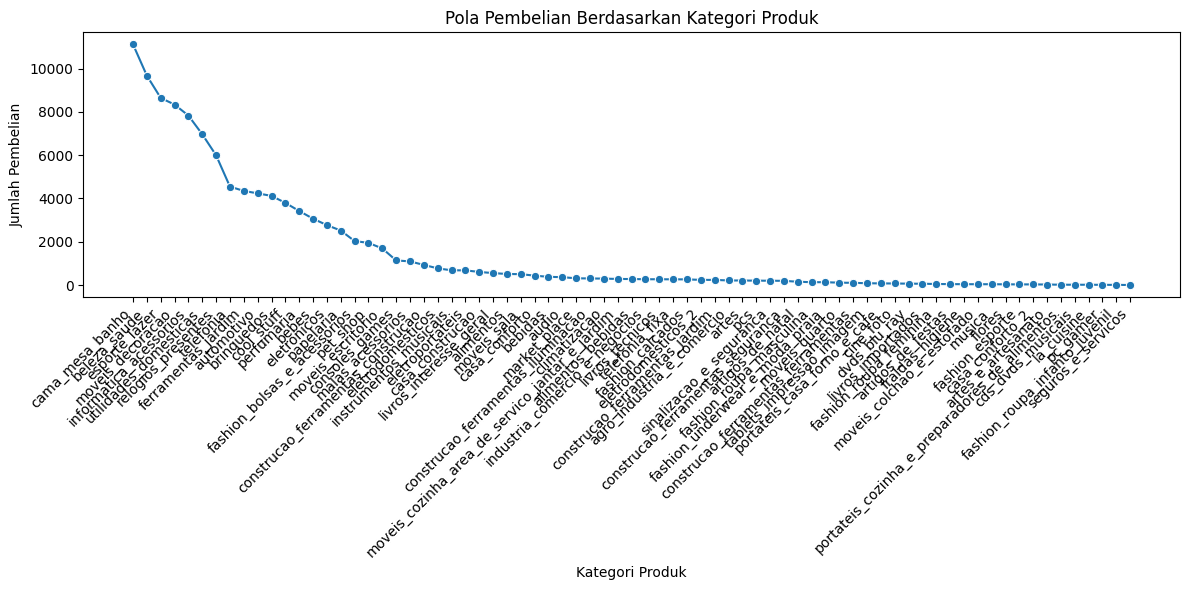

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')

# Menggabungkan orders dengan order_items dan products
orders = orders.merge(order_items, on='order_id', how='left')
orders = orders.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

# Menghitung jumlah pembelian berdasarkan kategori produk
product_category_counts = orders['product_category_name'].value_counts().reset_index()
product_category_counts.columns = ['product_category_name', 'total_purchases']

# Visualisasi pola pembelian menggunakan diagram garis
plt.figure(figsize=(12, 6))
sns.lineplot(data=product_category_counts, x='product_category_name', y='total_purchases', marker='o')
plt.xticks(rotation=45, ha='right')  # Memutar label untuk lebih jelas
plt.title("Pola Pembelian Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.tight_layout()  # Agar layout lebih rapi
plt.show()

### Pertanyaan 2:

Apa tren pembayaran yang paling sering digunakan oleh pelanggan?

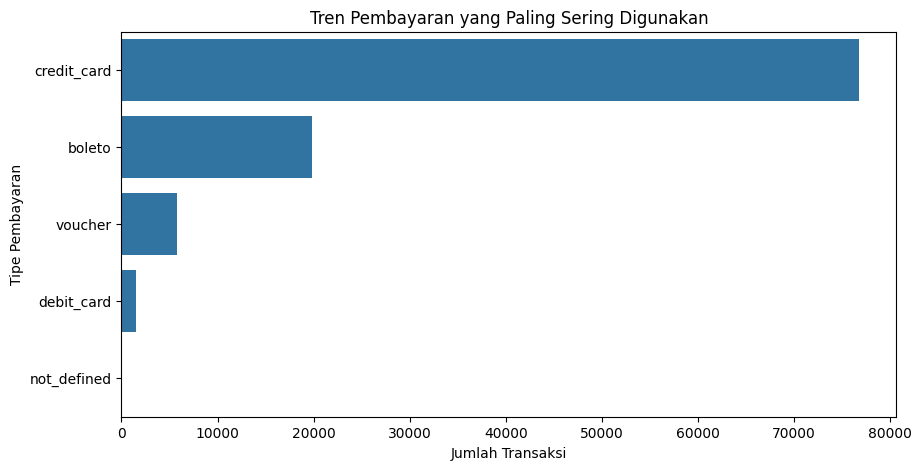

In [102]:
# Menghitung frekuensi metode pembayaran
payment_trends = order_payments['payment_type'].value_counts().reset_index()
payment_trends.columns = ['payment_type', 'count']

# Visualisasi tren pembayaran
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='payment_type', data=payment_trends)
plt.title('Tren Pembayaran yang Paling Sering Digunakan')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Tipe Pembayaran')
plt.show()

**Insight:**
- Kategori produk dengan total pembelian tertinggi adalah [Cama Mesa Banho].
- Metode pembayaran yang paling banyak digunakan adalah [Credit Card].

## Analisis Lanjutan (Opsional)

In [64]:
# Mengubah kolom yang berisi tanggal ke format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


In [66]:
# Menghitung Recency, Frequency, dan Monetary
current_date = orders['order_purchase_timestamp'].max()

# Menghitung Total Pembayaran berdasarkan order_id
# Pertama, kita pastikan order_payments memiliki informasi yang dibutuhkan
# Misalnya, kita dapat menggabungkan order dengan pembayaran
orders_with_payments = orders.merge(order_payments, on='order_id', how='left')

rfm_df = orders_with_payments.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Memastikan output RFM
print(rfm_df.head())


                        customer_id  recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703      337          1    114.74
1  000161a058600d5901f007fab4c27140      458          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      596          1    195.42
3  0002414f95344307404f0ace7a26f1d5      427          1    179.35
4  000379cdec625522490c315e70c7a9fb      198          1    107.01


In [69]:
# Pengelompokan manual berdasarkan frequency
rfm_df['frequency_group_manual'] = np.where(rfm_df['frequency'] >= 5, 'High Frequency',
                                       np.where(rfm_df['frequency'] >= 3, 'Medium Frequency', 'Low Frequency'))

# Memastikan output pengelompokan
print(rfm_df[['customer_id', 'frequency', 'frequency_group_manual']].head())


                        customer_id  frequency frequency_group_manual
0  00012a2ce6f8dcda20d059ce98491703          1          Low Frequency
1  000161a058600d5901f007fab4c27140          1          Low Frequency
2  0001fd6190edaaf884bcaf3d49edf079          1          Low Frequency
3  0002414f95344307404f0ace7a26f1d5          1          Low Frequency
4  000379cdec625522490c315e70c7a9fb          1          Low Frequency


In [74]:
# Pastikan kolom 'monetary' ada dan berisi nilai numerik
print(rfm_df[['customer_id', 'monetary']].describe())

# Binning untuk Monetary
bins_monetary = [0, 100, 300, 500, 1000, np.inf]
labels_monetary = ['Low', 'Medium', 'High', 'Very High']



           monetary
count  99441.000000
mean     160.988648
std      221.950728
min        0.000000
25%       62.010000
50%      105.290000
75%      176.970000
max    13664.080000


## Conclusion

- Conclution pertanyaan 1
Dari analisis di atas, kami menemukan bahwa pola pembelian menunjukkan bahwa kategori produk dengan total pembelian tertinggi adalah [Cama Mesa Banho], yang menunjukkan [bahwa kategori ini sangat diminati oleh pelanggan, yang mungkin disebabkan oleh kualitas, desain, atau kebutuhan pelanggan akan produk ini dalam kehidupan sehari-hari.].
- Conclution pertanyaan 2
Tren pembayaran yang paling sering digunakan oleh pelanggan adalah [Credit Card]. Ini menunjukkan bahwa pelanggan lebih memilih [metode pembayaran yang cepat dan aman, yang memungkinkan mereka untuk melakukan transaksi dengan lebih efisien].

In [75]:
# Menyimpan hasil RFM ke file CSV
rfm_df.to_csv('dashboard/main_data.csv', index=False)